In [12]:
import gzip
import shutil
from pathlib import Path
from datetime import datetime
import re, csv


def QScore_Cal(ASCII):
    list_Qscore = []
    list_ASCII = []
    Dict_Qscore = {}
    length_ASCII = len(ASCII)
    for each_ASCII in ASCII:
        each_Qscore = ord(each_ASCII)-33
        list_Qscore.append(each_Qscore)
        list_ASCII.append(each_ASCII)
        #Dict_Qscore = dict(list(zip(list_ASCII,list_Qscore)))
    sum_Qscore = sum(list_Qscore)
    average_Qscore = sum_Qscore/length_ASCII
    return average_Qscore

def ReadLength(gzfile):
    output = []    
    outputtime = datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
    with open('output-' + outputtime + '.tsv','w') as tableOut:
        writer = csv.writer(tableOut, delimiter = "\t")
        writer.writerow(['Read_ID', 'Read_length', 'Average_Qscore'])
        
    with gzip.open(gzfile, 'rb') as filein:
        with open('processfile.fastq', 'wb') as fileout:
            shutil.copyfileobj(filein, fileout)
            path = Path('processfile.fastq')
            with open(path, 'r') as readfile:
                lines = readfile.read()
                for data in re.finditer (r'@(?P<Read_ID>.*)\n(?P<Read_seq>\w*)\n(?P<plus>\+)\n(?P<Read_Qscore>.*)', lines):
                    readID = data.group('Read_ID')
                    #readsequence = data.group('Read_seq')
                    readQscore = data.group('Read_Qscore')
                    readlength = str(len(readQscore))
                    plus = data.group('plus')
                    readscore = data.group('Read_Qscore')
                    dataoutput = (readID, readlength,QScore_Cal(readQscore))
                    outputlist = list(dataoutput)

                    with open('output-' + outputtime + '.tsv','a') as tableOut:
                            writer = csv.writer(tableOut, delimiter = "\t")
                            for add in outputlist:
                                output.append(add)
                            writer.writerow(outputlist)
                            
    path.unlink()
    
    print ("Read length analysis complete")
    
    
ReadLength("ont.exp2.fastq.gz")
# ReadLength("I7-LDF10936_L2_1.fq.gz")

KeyboardInterrupt: 

In [8]:
import gzip
import shutil
from pathlib import Path
from datetime import datetime
import re, csv
import json


def QScore_Cal(ASCII):
    list_Qscore = []
    list_ASCII = []
    Dict_Qscore = {}
    length_ASCII = len(ASCII)
    for each_ASCII in ASCII:
        each_Qscore = ord(each_ASCII)-33
        list_Qscore.append(each_Qscore)
        list_ASCII.append(each_ASCII)       
    sum_Qscore = sum(list_Qscore)
    average_Qscore = sum_Qscore/length_ASCII
    return round(average_Qscore,0) 

def ReadLength(gzfile):  
    rowss = 0   
    str_json = ""
    j_data = []
    with gzip.open(gzfile, 'rb') as filein:
        with open('processfile.fastq', 'wb') as fileout:
            shutil.copyfileobj(filein, fileout)
            path = Path('processfile.fastq')          
            with open(path, 'r') as readfile:
                lines = readfile.read()
                for data in re.finditer (r'@(?P<Read_ID>\w*).*barcode=(?P<Read_barcode>\w*).*\n.*\n\+\n(?P<Read_Qscore>.*)', lines):                    
                    rowss += 1 
                    readID = data.group('Read_ID') 
                    readBarcode = data.group('Read_barcode') 
                    readQscore = data.group('Read_Qscore') 
                    readlength = str(len(readQscore))                    
                    Q_score = str(QScore_Cal(readQscore))                   
                    str_json = "{\"Read_ID\":\"" + readID + "\",\"Read_barcode\":\"" + readBarcode + "\",\"Read_length\":" + readlength + ",\"Average_Qscore\":" + Q_score + ",\"No\":" + str(rowss) + "}"
                    j_data.append(str_json)
                    
    path.unlink()     
    write_list(j_data)    
    print ("Read length analysis complete")
    

def write_list(a_list):
    print("Started writing list data into a json file")
    with open("results.json", "w") as fp:
        json.dump(a_list, fp)
        print("Done writing JSON data into .json file")
ReadLength("ont.exp2.fastq.gz")

Started writing list data into a json file
Done writing JSON data into .json file
Read length analysis complete


In [10]:
import json
import pandas as pd
import numpy as np
# load data using Python JSON module
with open('results.json','r') as f:
    data = json.loads(f.read())
print(type(data))
print(len(data))


<class 'list'>
365178


Average_Qscore : Max 60.0
Average_Qscore : Min 5.0
Average_Qscore : Mean 21.336411284359954
///////////
Average_length : Max 193225
Average_length : Min 1
Average_length : Mean 4283.868217691099
Reads : 365178
Bases : 1564374428


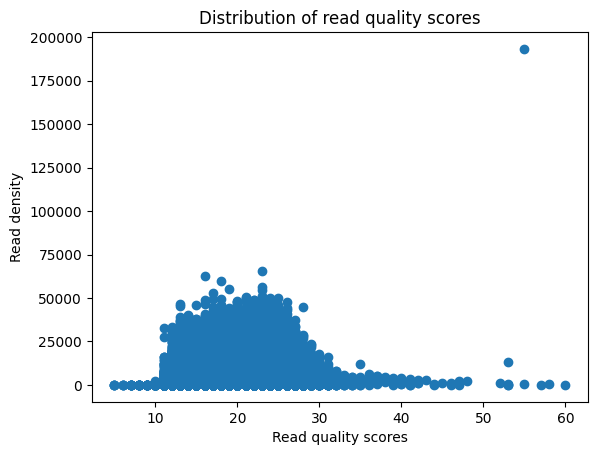

In [11]:
import matplotlib.pyplot as plt
def max_q (list_data):
    arr_value = np.array(list_data)
    max_value = np.max(arr_value)
    return max_value

def mean_q (list_data):   
    arr_value = np.array(list_data)
    max_value = np.mean(arr_value)
    return max_value

def min_q (list_data):   
    arr_value = np.array(list_data)
    max_value = np.min(arr_value)
    return max_value
def sum_q (list_data):   
    arr_value = np.array(list_data)
    max_value = np.sum(arr_value)
    return max_value

avg_score_data = []
length_data = []
for x in data:
    aList = json.loads(x)
    avg_score_data.append(aList["Average_Qscore"])
    length_data.append(aList["Read_length"])
    #df = pd.DataFrame(aList, columns=list("ABCD"))
   # print(aList["Average_Qscore"])
 
print("Average_Qscore : Max " + str(max_q(avg_score_data)))
print("Average_Qscore : Min " + str(min_q(avg_score_data)))
print("Average_Qscore : Mean " + str(mean_q(avg_score_data)))
print("///////////")
print("Average_length : Max " + str(max_q(length_data)))
print("Average_length : Min " + str(min_q(length_data)))
print("Average_length : Mean " + str(mean_q(length_data)))

print("Reads : " + str(len(data)))
print("Bases : " + str(sum_q(length_data)))

plt.scatter(avg_score_data, length_data)
plt.title("Distribution of read quality scores")
plt.xlabel("Read quality scores")
plt.ylabel("Read density")
plt.show()




In [12]:
lst = [(20.0, 28646), (25.0, 33644), (21.0, 35619)]
lst.sort(key=lambda x:x[0])
print(lst)

[(20.0, 28646), (21.0, 35619), (25.0, 33644)]


In [13]:
out_array = np.log10(length_data)
length_log = []
for v in out_array :
    
    length_log.append(round(v,1))
 

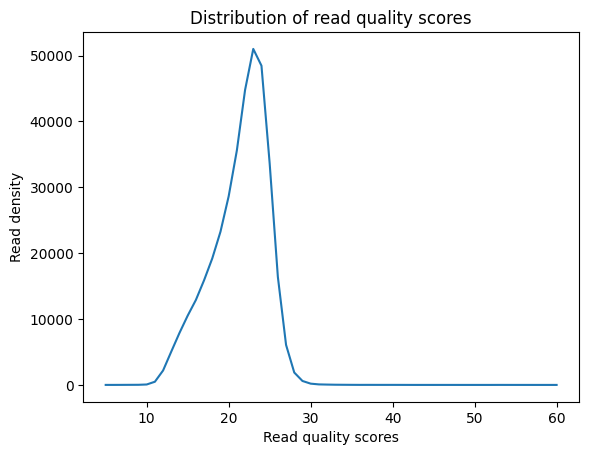

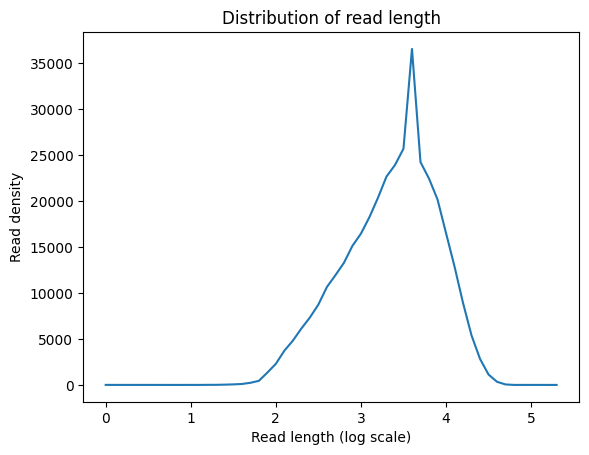

In [14]:
from collections import Counter
  
def group_list(lst):
      
    return list(zip(Counter(lst).keys(), Counter(lst).values()))
      
 
avg_score_data_list = group_list(avg_score_data)
lst = avg_score_data_list
lst.sort(key=lambda x:x[0])
 
x = []
y = []
for v in lst:    
    x.append(v[0])
    y.append(v[1])

plt.plot(x, y)
plt.title("Distribution of read quality scores")
plt.xlabel("Read quality scores")
plt.ylabel("Read density")
plt.show()

length_data_list = group_list(length_log)
lst = length_data_list
lst.sort(key=lambda x:x[0])
#print(lst)
x = []
y = []
 
for v in lst: 
    x.append(v[0])
    y.append(v[1])
plt.plot(x, y)
plt.title("Distribution of read length")
plt.xlabel("Read length (log scale)")
plt.ylabel("Read density")
plt.show()


In [15]:
def QScore_Cal(ASCII):
    list_Qscore = []
    list_ASCII = []
    Dict_Qscore = {}
    length_ASCII = len(ASCII)
    for each_ASCII in ASCII:
        each_Qscore = ord(each_ASCII)-33
        list_Qscore.append(each_Qscore)
        list_ASCII.append(each_ASCII)
        #Dict_Qscore = dict(list(zip(list_ASCII,list_Qscore)))
    sum_Qscore = sum(list_Qscore)
    average_Qscore = sum_Qscore/length_ASCII
    return average_Qscore